# Voting Classifiers

## Hard Voting classifier

In [1]:
# Try it out with the moons dataset

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

moons = make_moons(n_samples=10000, noise=0.3)
X_train, X_test, y_train, y_test = train_test_split(moons[0], moons[1], test_size=0.2, random_state=42)

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard'
)

voting_clf.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFo...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [2]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


LogisticRegression 0.8535
RandomForestClassifier 0.899
SVC 0.9135


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier 0.9095


## Soft Voting classifier

In [3]:
proba_svm_clf = SVC(probability=True)
soft_voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', proba_svm_clf)],
    voting = 'soft',
)

for clf in (log_clf, rnd_clf, proba_svm_clf, soft_voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8535


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RandomForestClassifier 0.8995
SVC 0.9135


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier 0.912


# Bagging and Pasting

In [4]:
# Bagging with 500 decision trees

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1
)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print("Bagging:", accuracy_score(y_test, y_pred))

Bagging: 0.916


In [5]:
# Pasting with 500 decision trees - difference is setting bootstrap to False

pst_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=False, n_jobs=-1
)

pst_clf.fit(X_train, y_train)
y_pred = pst_clf.predict(X_test)
print("Pasting:", accuracy_score(y_test, y_pred))

Pasting: 0.914


## Out-of-Bag Evaluation

In [6]:
# Set oob_score=True for individual estimators to test against items not included in their training set

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True
)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_ # Estimate of what the test set accuracy will be

0.89925

In [7]:
# Actual test set accuracy
y_pred = bag_clf.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))

Accuracy score: 0.9025


# Random Forests

In [8]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred_rf))

Accuracy score: 0.909


In [9]:
# This bagging classifier is roughly equal to the above Random Forest Classifier, as there are certain
# hyperparameters that are auto-set for us

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)

y_pred_bag = bag_clf.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred_bag))

Accuracy score: 0.9125


In [78]:
# Extremely Randomized Trees, aka Extra-Trees, split nodes on a random feature that meets a threshold rather than
# the best of a random set of features

from sklearn.ensemble import ExtraTreesClassifier

ex_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
ex_clf.fit(X_train, y_train)

y_pred_ex = ex_clf.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred_ex))

Accuracy score: 0.9035


## Feature Importance

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.09951872087658523
sepal width (cm) 0.023832629117815578
petal length (cm) 0.42608591820295644
petal width (cm) 0.45056273180264306


# Boosting

## AdaBoost

In [13]:
# Run multiple predictor's sequentially, each one putting more weight on misclassified examples from previous
# predictor. To make overall prediction, compute predictions of all the predictors and weight them with the
# predictors weights. Overall predicted class is the majority of weighted votes.

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5
)
ada_clf.fit(X_train, y_train)

y_pred_ada = ada_clf.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred_ada))

Accuracy score: 0.9115


## Gradient Boosting

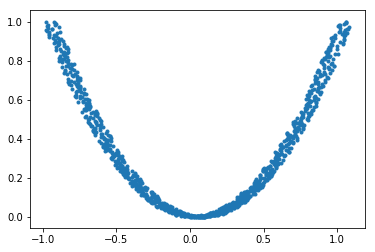

In [57]:
# Create a noisy quadratic function for dataset

import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

qX = np.linspace(-1, 1, num=1000)
qy = qX**2
for i in range(len(qX)):
    qX[i] += random.uniform(0.0, 0.1)

plt.scatter(qX, qy, marker='.')
plt.show()

In [59]:
# Example with regression using Decision Trees as base predictor above data

from sklearn.tree import DecisionTreeRegressor

# First DT
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(qX_train.reshape(-1,1), qy_train)

# Second DT trained on the residual errors made by the first DT
qy2_train = qy_train - tree_reg1.predict(qX_train.reshape(-1,1))
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(qX_train.reshape(-1,1), qy2_train)

# Third DT trained on the residual errors made by the second DT
qy3_train = qy2_train - tree_reg2.predict(qX_train.reshape(-1,1))
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(qX_train.reshape(-1,1), qy3_train)

qy_pred = sum(tree.predict(qX_test.reshape(-1,1)) for tree in (tree_reg1, tree_reg2, tree_reg3))

MSE for our DT ensemble: 0.007855264067856697


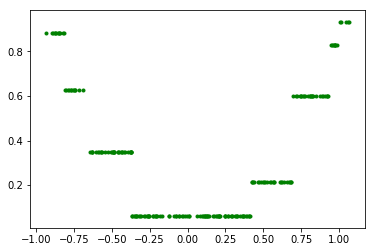

In [70]:
# See how well it did to compare against other methods later

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(qy_test, qy_pred)
print("MSE for our DT ensemble:", mse)

plt.scatter(qX_test, qy_pred, marker=".", color="g")

MSE for GBRT: 0.007855264067856693


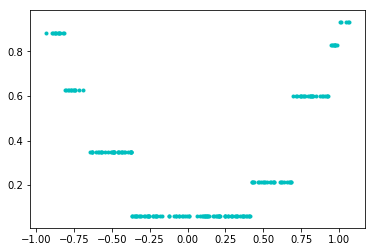

In [71]:
# Now let's do it with Scikit-Learn's class

from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(qX_train.reshape(-1,1), qy_train)
qy_pred_gbrt = gbrt.predict(qX_test.reshape(-1,1))
mse_gbrt = mean_squared_error(qy_test, qy_pred_gbrt)
print("MSE for GBRT:", mse_gbrt)

plt.scatter(qX_test, qy_pred_gbrt, marker=".", color="c")
plt.show()

MSE for GBRT Big: 0.0012617025303056511


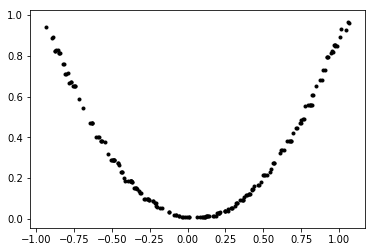

In [72]:
# Let's try a bigger GBRT and see if it does better

gbrt_big = GradientBoostingRegressor(max_depth=2, n_estimators=1000, learning_rate=0.01)
gbrt_big.fit(qX_train.reshape(-1,1), qy_train)
qy_pred_gbrt_big = gbrt_big.predict(qX_test.reshape(-1,1))
mse_gbrt_big = mean_squared_error(qy_test, qy_pred_gbrt_big)
print("MSE for GBRT Big:", mse_gbrt_big)

plt.scatter(qX_test, qy_pred_gbrt_big, marker=".", color="k")

In [77]:
# Find the optimal number of trees with stage_predict()

gbrt_med = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt_med.fit(qX_train.reshape(-1,1), qy_train)

errors = [mean_squared_error(qy_test, y_pred) for y_pred in gbrt_med.staged_predict(qX_test.reshape(-1,1))]
bst_n_estimators = np.argmin(errors)
print("Best # of estimators:", bst_n_estimators)

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(qX_train.reshape(-1,1), qy_train)
mse_best = mean_squared_error(qy_test, gbrt_best.predict(qX_test.reshape(-1,1)))
print("Best (?) MSE:", mse_best)

Best # of estimators: 90
Best (?) MSE: 0.001258759144495144


In [81]:
# Can also manually do early stopping

gbrt_stop = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float("inf") # initialize the minimum value to infinity
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt_stop.n_estimators = n_estimators
    gbrt_stop.fit(qX_train.reshape(-1,1), qy_train)
    y_pred = gbrt_stop.predict(qX_test.reshape(-1,1))
    error = mean_squared_error(qy_test, y_pred)
    if error < min_val_error:
        min_val_error = error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break # early stopping

print("We stopped at:", n_estimators)
print("MSE:", error)

We stopped at: 96
MSE: 0.0012664811058680611
